In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [119]:
tweets = pd.read_csv("train.csv")

Analisis general sobre el set

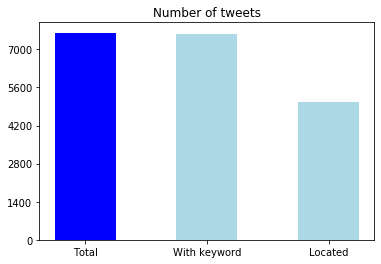

In [120]:
tweet_counts = tweets.count().loc[["id","keyword","location"]]
fig, ax = plt.subplots()
plt.bar(("Total","With keyword","Located"), tweet_counts.values,width = 0.5,color=["blue","lightblue","lightblue"])
ax.set_title('Number of tweets')
ax.set_yticks([0,1400,2800,4200,5600,7000])
plt.savefig('plots/barplot_dataset_count.png')

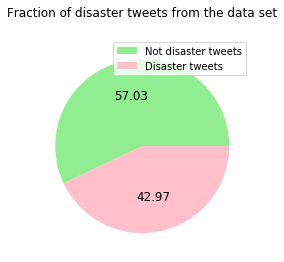

In [136]:
ax= tweets["target"].value_counts().plot(kind='pie',autopct='%.2f', labels=None,colors=["lightgreen","pink"], title="Fraction of disaster tweets from the data set\n", fontsize=12,label="")
ax.legend(loc=0, labels=["Not disaster tweets","Disaster tweets"])
plt.savefig('plots/pieplot_fraction_of_disaster_tweets.png')

Relacion entre la ubicacion y la veracidad de los tweets

In [122]:
# tweets["location"] == tweets["location"] devuelve false si es un NaN

tweets["located"] = tweets["location"] == tweets["location"]
tweets.loc[tweets["located"] == True,"located"] = 1
tweets.loc[tweets["located"] == False ,"located"] = 0
tweets["located"] = tweets["located"].astype(int)
tweets.head(100)

,id,keyword,location,text,target,located
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
...,...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0,1
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0,1


In [123]:
grouped = tweets.groupby(["target","located"]).agg({"target":["count"]})
grouped.columns = ["count"]
grouped.head()

count
target located       
0      0         1458
       1         2884
1      0         1075
       1         2196

In [124]:
grouped2 = grouped.reset_index()
grouped2.head()

,target,located,count
0,0,0,1458
1,0,1,2884
2,1,0,1075
3,1,1,2196


In [125]:
pivoted= grouped2.pivot("target","located")
pivoted

count      
located     0     1
target             
0        1458  2884
1        1075  2196

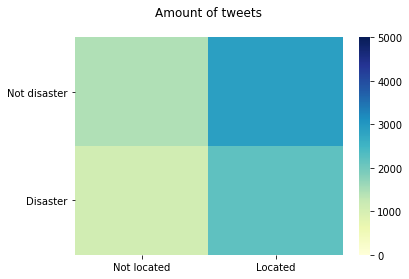

In [126]:

ax = sns.heatmap(pivoted,vmin=0, vmax=5000,cmap="YlGnBu",xticklabels=["Not located","Located"],yticklabels=["Not disaster","Disaster"])
ax.set(xlabel= "",ylabel = "",title= "Amount of tweets\n")
ax.set_yticklabels(ax.get_yticklabels(), rotation =0)
plt.savefig('plots/heatmap_loc_vs_tar.png',bbox_inches='tight')

Analisis de la cantidad de la cantidad de paises que tienen la misma ubicacion


In [127]:
grouped2 = tweets.groupby("location").agg({"located":"sum","target":"sum"})
grouped2 = grouped2.nlargest(10,"located")
grouped2

,located,target
location,,
USA,104,67
New York,71,16
United States,50,27
London,45,16
Canada,29,13
Nigeria,28,22
UK,27,16
"Los Angeles, CA",26,8
India,24,20


In [128]:
grouped2.rename(columns={"target": "true"},inplace=True)
grouped2["false"] = grouped2["located"]-grouped2["true"] 
grouped2

,located,true,false
location,,,
USA,104,67,37
New York,71,16,55
United States,50,27,23
London,45,16,29
Canada,29,13,16
Nigeria,28,22,6
UK,27,16,11
"Los Angeles, CA",26,8,18
India,24,20,4


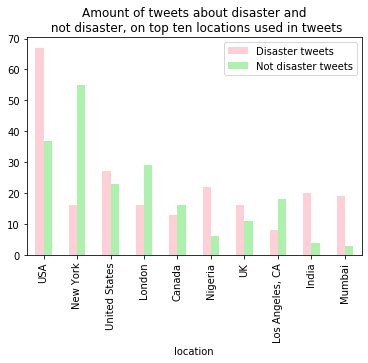

In [142]:
grouped2[["true","false"]].plot(kind="bar", stacked=False,color=("pink","lightgreen"),alpha=0.75)
plt.legend(("Disaster tweets","Not disaster tweets"))
plt.title("Amount of tweets about disaster and\n not disaster, on top ten locations used in tweets")
plt.savefig('plots/barplot_top_ten_loc.png',bbox_inches='tight')

Largo promedio de las palabras 

In [130]:
def mean_len_word_per_text(text):
    
    words = text.split(" ")
    total_words = 0
    mean = 0

    for word in words:
        if not word is '':
            mean += len(word)
            total_words += 1

    mean /= total_words

    return round(mean,3)

In [131]:
tweets["mean_len_word"] = tweets["text"].apply(mean_len_word_per_text)
tweets

,id,keyword,location,text,target,located,mean_len_word
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0,4.385
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,4.571
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,5.091
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0,7.125
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0,4.500
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0,6.636
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,5.300
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0,7.250
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,6.263


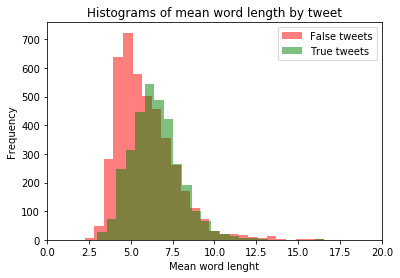

In [132]:
g = tweets["mean_len_word"].loc[tweets["target"] == 0].plot.hist(label= "False tweets", alpha = 0.5,color= "red",bins=100,legend= True)
g = tweets["mean_len_word"].loc[tweets["target"] == 1].plot.hist(label= "True tweets", alpha = 0.5,color= "green",bins=100,xlim = (0,20),legend= True)
g.set_title("Histograms of mean word length by tweet")
g.set_xlabel("Mean word lenght")
g.set_ylabel("Frequency")
plt.savefig('plots/hists_mean_word_len_per_tw.png')

Analizando la localizacion del top 3 de etiquetas mas usadas.

In [133]:
tweets

,id,keyword,location,text,target,located,mean_len_word
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0,4.385
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,4.571
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,5.091
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0,7.125
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0,4.500
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0,6.636
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,5.300
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0,7.250
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,6.263


In [134]:
keyword_true_located = tweets.loc[(tweets["target"] == 1 ) & (tweets["located"] == 1),"keyword"]
keyword_true_located.value_counts().nlargest(20)


outbreak                 30
wreckage                 28
oil%20spill              27
collision                26
buildings%20on%20fire    25
evacuated                25
derailment               25
typhoon                  24
sandstorm                24
earthquake               24
airplane%20accident      24
drought                  23
evacuation               23
suicide%20bomb           22
mass%20murder            22
derailed                 22
debris                   22
wounded                  21
flooding                 21
accident                 21
Name: keyword, dtype: int64

Queremos saber cual es el pais que más tweets tiene hablando de temas que estan en el TOP3 del keyword

In [135]:
tweets_outbreak_true = tweets.loc[(tweets.keyword == "outbreak") & ((tweets.target == 1) & (tweets.located == 1))]
tweets_outbreak_true

,id,keyword,location,text,target,located,mean_len_word
5280,7545,outbreak,Chile,Families to sue over Legionnaires: More than 4...,1,1,6.611
5283,7550,outbreak,"EspaÌ±a, Spain",Legionnaires' Disease: What's Being Done to St...,1,1,7.800
5284,7551,outbreak,"New York City, NY",10th death confirmed in Legionnaires' outbreak...,1,1,7.000
5285,7552,outbreak,Indonesia,More than 40 families affected by the fatal ou...,1,1,5.850
5287,7554,outbreak,LAGOS,Families to sue over Legionnaires: More than 4...,1,1,6.611
5288,7555,outbreak,NJ/NYC,Wow-the name #LegionnairesDisease comes from a...,1,1,6.000
5289,7556,outbreak,??????,'Legionnaires' Disease: What's Being Done to S...,1,1,8.273
5290,7557,outbreak,???,Families to sue over Legionnaires: More than 4...,1,1,6.611
5293,7560,outbreak,Bandung,Families to sue over Legionnaires: More than 4...,1,1,6.611
5294,7561,outbreak,United States,Families to sue over Legionnaires: More than 4...,1,1,6.611
